In [77]:
"""

Bad masking - RETRAIN
Streaks - RETRAIN
Ombre - RETRAIN 

Hot pixels - GENERATE
plus/cross - GENERATE
L shape - GENERATE
"""
from kevlib import common_import_script
%run $common_import_script
from astropy.coordinates import SkyCoord
from astroscrappy import detect_cosmics
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans
import lmfit
from astropy.io import fits
from kevlib.utils.plot import plot_images
import random

---------------------------------------------------------------------------------------
|                        Last run date: 2025-06-10 01:58 PM E                         |
---------------------------------------------------------------------------------------
| Python | Jupyterlab | Numpy  | Scipy  | Astropy | Matplotlib | Tensorflow | Pytorch |
---------------------------------------------------------------------------------------
| 3.11.4 |   4.1.2    | 1.24.3 | 1.11.1 |  5.3.1  |   3.8.3    |   2.13.1   |  2.0.1  |
---------------------------------------------------------------------------------------


# Load previous candidate images

In [78]:
import numpy as np

In [79]:
ims = np.load("../2025Work/Searches/V2_Apr9_pos_pt5_664k_2moreconvlayers.npy")

In [80]:
bkgs = np.load("./TrainingData/S1_shifted_DarkPixelsRemoved_Normalized_FinalDeployBitArtifactCleaned.npy")

In [5]:
ims = list(ims)

In [15]:
# plot_images(ims[100:400], n_rows=30, fig_height=2)

In [27]:
plt.close()

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_in_grid(image_arrays, images_per_row=50):
    # Number of images
    total_images = len(image_arrays)

    num_rows = (total_images + images_per_row - 1) // images_per_row
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row, num_rows), dpi=80)
    axes = axes.flatten()

    for idx, img_array in enumerate(image_arrays):
        try:
            if img_array.max() > 1:
                img_array = img_array / img_array.max()

            axes[idx].imshow(img_array, cmap='gray')
        except Exception as e:
            print(f"Could not process image {idx}: {e}")
            axes[idx].axis('off')
        
        axes[idx].axis('off')

    for idx in range(total_images, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()


In [7]:
plt.close()

# Generate Hot Pixel Images

## Prelim work

In [ ]:
plot_images(ims[300:400],fig_height=1,n_rows=10)

In [8]:
high_vals = []
for i in ims:
    high_vals.append(np.max(i))

## Generation

In [35]:
import random
bkgs = np.load("./TrainingData/S1_shifted_DarkPixelsRemoved_Normalized_FinalDeployBitArtifactCleaned.npy")
choices = [1, 2, 3, 4, 5]
weights = [10, 2, 1, 1, 1]

for im in bkgs[:10]:
    num_to_implant = random.choices(choices, weights)[0]

    for _ in range(num_to_implant):
        x = random.randint(0, 14)
        y = random.randint(0, 14)
        im[x, y] = random.triangular(low=0.5, 30)


In [56]:
import random
import numpy as np
import math
bkgs = np.load("./TrainingData/S1_shifted_DarkPixelsRemoved_Normalized_FinalDeployBitArtifactCleaned.npy")

sigma = 1.0
mu = math.log(0.6) + sigma**2

choices = [1,2,3,4,5]
weights = [10, 2, 1, 1, 1]
vals = []

def implant_lognormal_brightness(bkgs, num_images=10, cap=600.0):
    for im in bkgs[:num_images]:
        n_spikes = random.choices(choices, weights)[0]
        for _ in range(n_spikes):
            # sample until I get >=0.6
            b = np.random.lognormal(mean=mu, sigma=sigma)
            while b < 0.7:
                b = np.random.lognormal(mean=mu, sigma=sigma)
            # clamp to cap
            b = min(b, cap)
            # pick location
            x = random.randint(0, im.shape[0]-1)
            y = random.randint(0, im.shape[1]-1)
            im[x, y] = b
            vals.append(b)

implant_lognormal_brightness(bkgs, 50000, cap = 600.0)

(array([1.3383e+04, 1.1308e+04, 9.3440e+03, 7.5350e+03, 6.1770e+03,
        5.1750e+03, 4.3870e+03, 3.5500e+03, 2.9240e+03, 2.6170e+03,
        2.1720e+03, 1.8730e+03, 1.6040e+03, 1.4250e+03, 1.2710e+03,
        1.1740e+03, 9.8000e+02, 8.1100e+02, 6.8400e+02, 6.9900e+02,
        6.3400e+02, 5.2100e+02, 4.7800e+02, 4.0600e+02, 3.8700e+02,
        3.7200e+02, 3.2300e+02, 2.7700e+02, 2.6000e+02, 2.5000e+02,
        2.3000e+02, 2.1100e+02, 2.2200e+02, 1.6400e+02, 1.7100e+02,
        1.4400e+02, 1.4000e+02, 1.2700e+02, 1.1900e+02, 1.1000e+02,
        8.7000e+01, 9.0000e+01, 9.5000e+01, 7.8000e+01, 7.6000e+01,
        6.5000e+01, 6.4000e+01, 4.9000e+01, 5.8000e+01, 4.8000e+01,
        4.4000e+01, 5.4000e+01, 4.5000e+01, 4.2000e+01, 3.7000e+01,
        3.6000e+01, 2.7000e+01, 2.2000e+01, 2.9000e+01, 3.4000e+01,
        2.5000e+01, 2.9000e+01, 3.0000e+01, 1.7000e+01, 2.6000e+01,
        1.4000e+01, 1.6000e+01, 2.1000e+01, 2.4000e+01, 2.3000e+01,
        1.4000e+01, 1.4000e+01, 1.0000e+01, 1.20

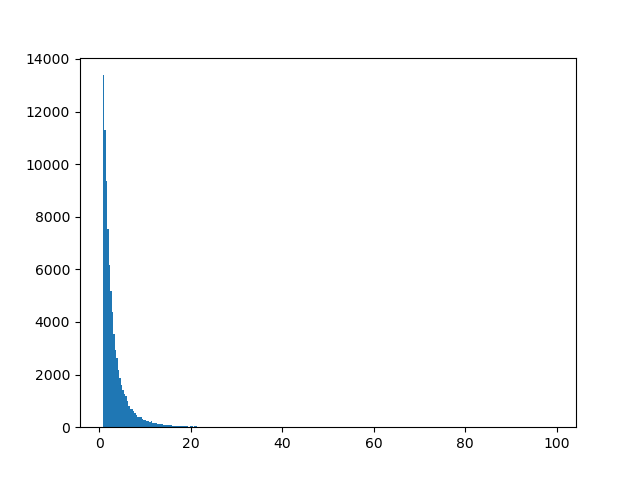

In [57]:
plt.figure()
plt.hist(vals,bins=300)

In [74]:
plt.close()

array([<Axes: >], dtype=object)

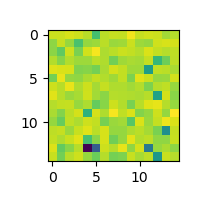

In [76]:
plot_images(list(bkgs[50000:50001]), fig_height=2,norm_same = False)

In [81]:
hps = np.load("./TrainingData/FalseSet/50k_synth_hot_pixels_part1_falsetrainingset_S1shiftedbkgs.npy")
len(hps)

50000

# Generate Plus Pixel Images 

In [68]:
bkgs = np.load("./TrainingData/S1_shifted_DarkPixelsRemoved_Normalized_FinalDeployBitArtifactCleaned.npy")

for im in bkgs[120000:140000]:
    x = random.randint(1,13)
    y = random.randint(1,13)
    main_val = random.uniform(0.5,2)

    im[x][y + 1] = main_val * random.uniform(0.5,2)
    im[x][y - 1] = main_val * random.uniform(0.5,2)
    im[x + 1][y] = main_val * random.uniform(0.5,2)
    im[x - 1][y] = main_val * random.uniform(0.5,2)


In [72]:
plt.close()

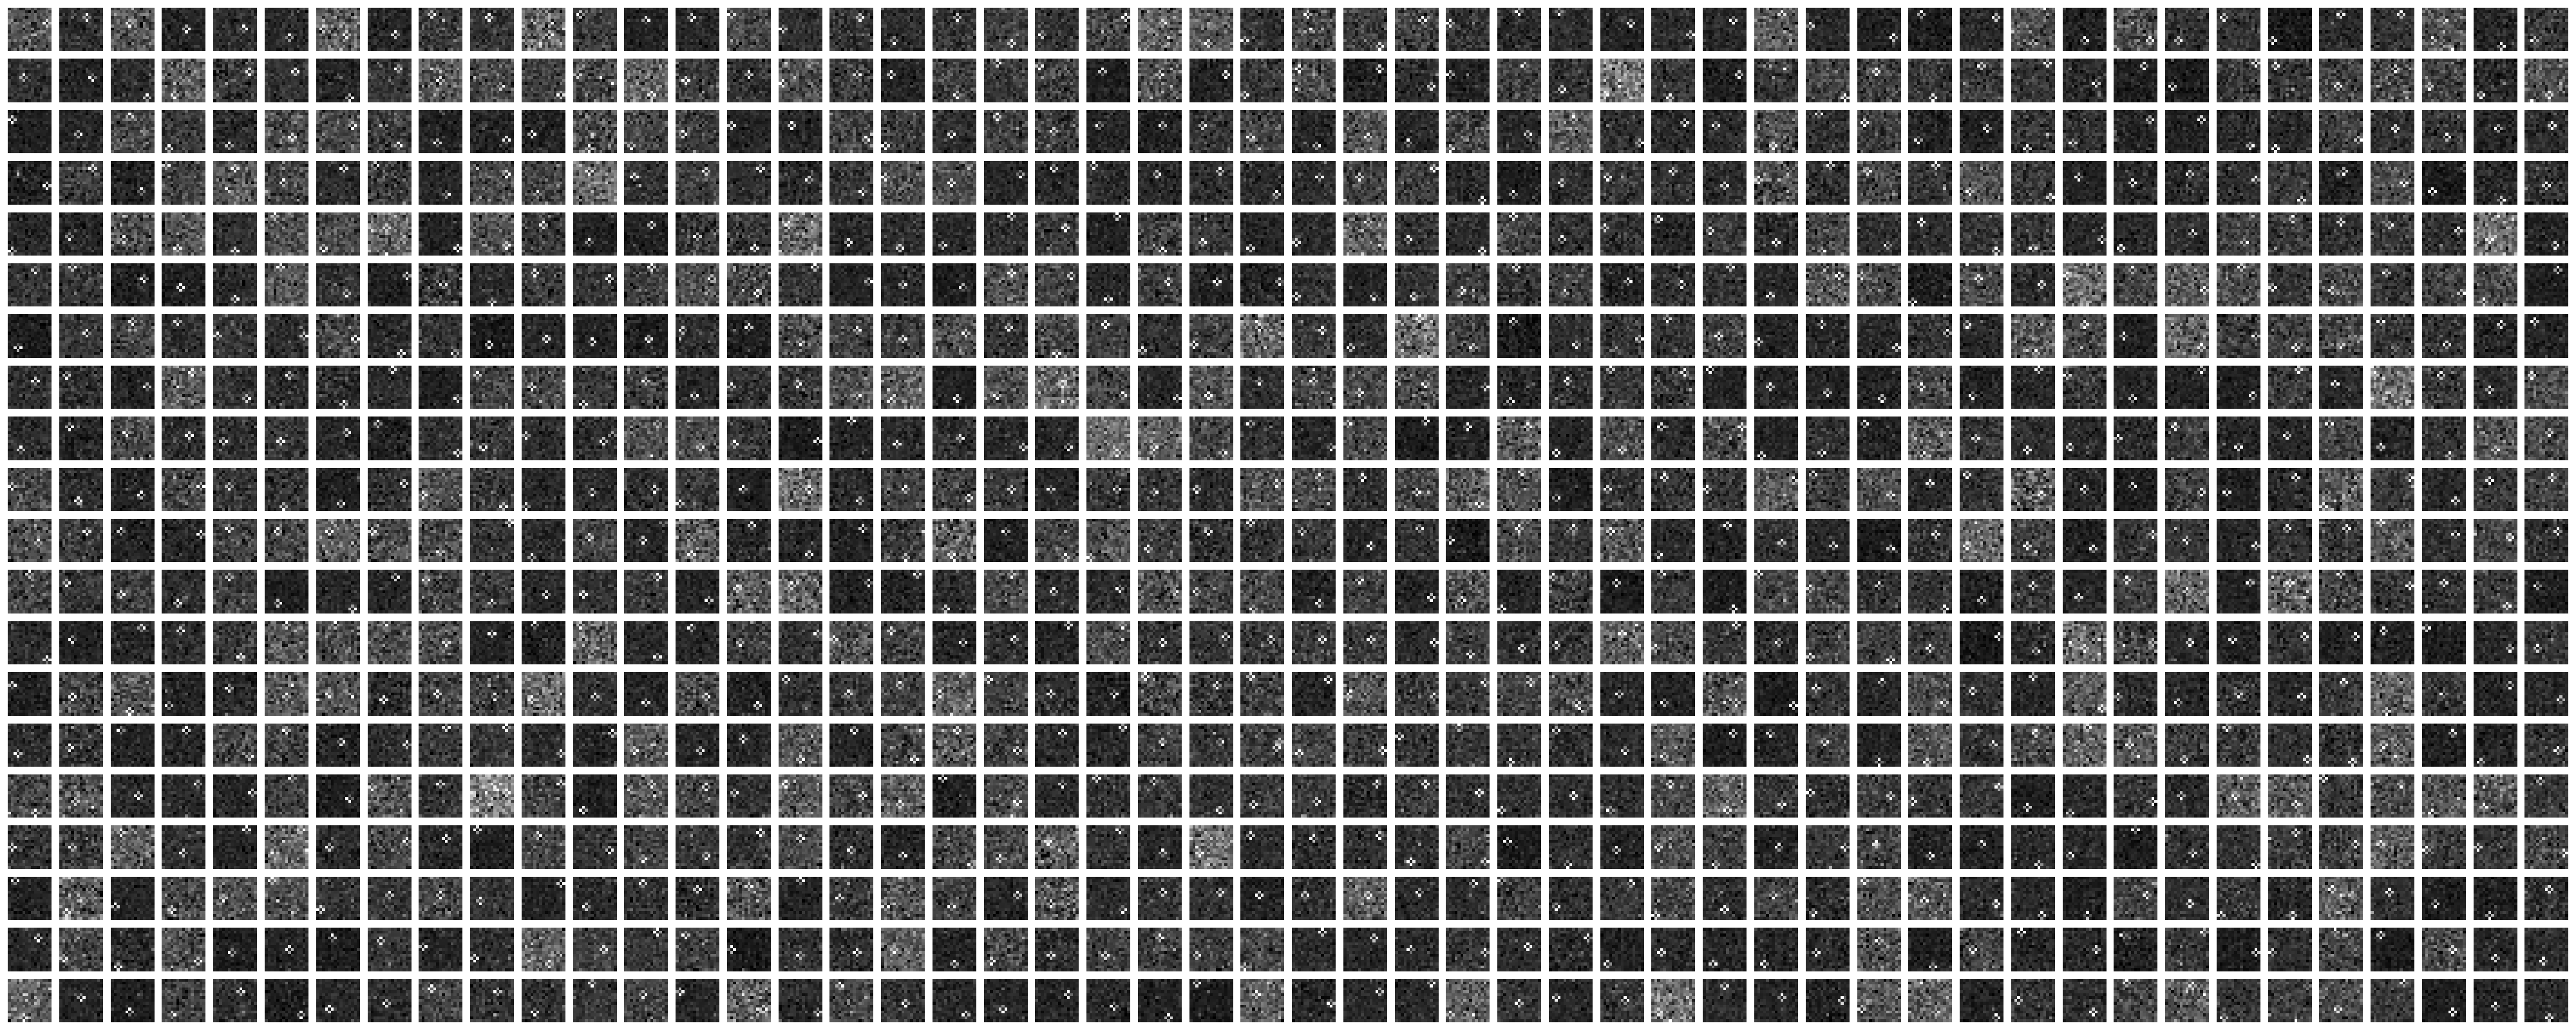

In [73]:
plot_images_in_grid(bkgs[121000:122000])

In [74]:
np.save("./TrainingData/FalseSet/20k_synth_plus_shapes", bkgs[120000:140000])

# Generate V-shapes 

In [63]:
import random
bkgs = np.load("./TrainingData/S1_shifted_DarkPixelsRemoved_Normalized_FinalDeployBitArtifactCleaned.npy")

for im in bkgs[100000:120000]:
    x = random.randint(1, 13)
    y = random.randint(1, 13)
    main_val = random.uniform(0.5, 4)

    orientation = random.choice(['down', 'up', 'left', 'right'])
    if orientation == 'down':
        offsets = [(0, -1), (1, 0), (0, +1)]
    elif orientation == 'up':
        offsets = [(0, -1), (-1, 0), (0, +1)]
    elif orientation == 'left':
        offsets = [(-1, 0), (0, -1), (+1, 0)]
    else:
        offsets = [(-1, 0), (0, +1), (+1, 0)]

    for dx, dy in offsets:
        im[x + dx][y + dy] = main_val * random.uniform(0.5,2)


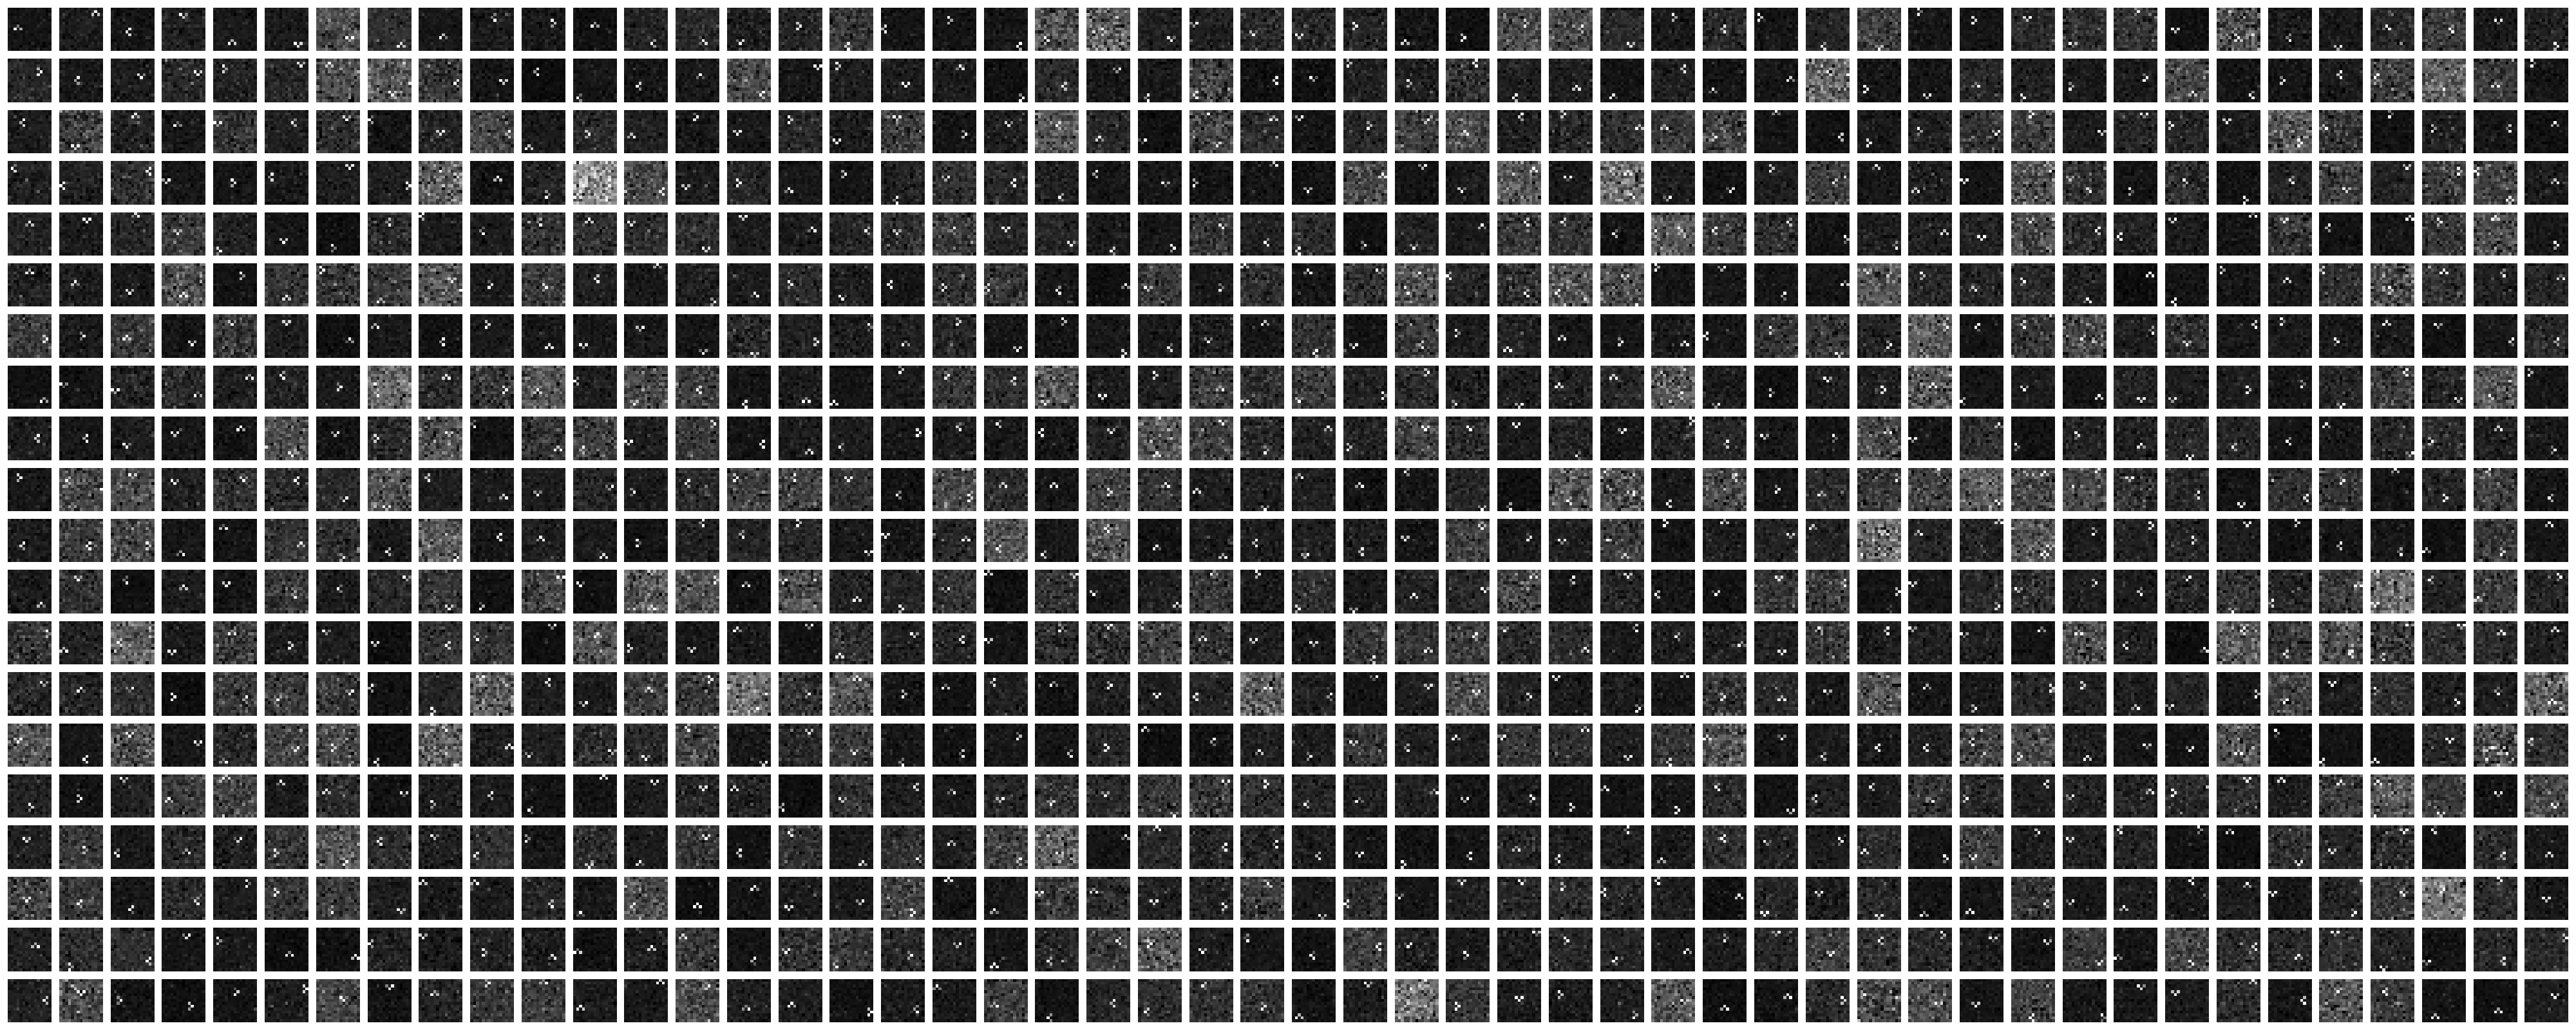

In [64]:
plt.close()
plot_images_in_grid(bkgs[100000:101000])

In [65]:
np.save("./TrainingData/FalseSet/20k_synth_V_shapes", bkgs[100000:101000])

# Generate L-shape Pixels

In [57]:
import numpy as np
import random

bkgs = np.load("./TrainingData/S1_shifted_DarkPixelsRemoved_Normalized_FinalDeployBitArtifactCleaned.npy")

for im in bkgs[90000:100000]:
    x = random.randint(1, im.shape[0]-2)
    y = random.randint(1, im.shape[1]-2)
    main_val = random.uniform(0.5, 5)

    horiz = random.choice([-1, 1])
    vert  = random.choice([-1, 1])

    im[x, y] = main_val
    im[x, y + horiz] = main_val * random.uniform(0.5, 2)
    im[x + vert, y] = main_val * random.uniform(0.5, 2)


In [59]:
# plt.close()

# plt.close()
# plt.close()
# plt.close()
# plot_images_in_grid(bkgs[91000:92000])


In [60]:
np.save("./TrainingData/FalseSet/10k_Lshape_synthetic", bkgs[90000:100000])

# Collect Streak Images

In [46]:
ims = np.array(ims)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_in_grid(image_arrays, images_per_row=50):
    # Number of images
    total_images = len(image_arrays)

    # Calculate the number of rows needed based on the total number of images
    num_rows = (total_images + images_per_row - 1) // images_per_row  # This ensures rounding up

    # Create a plot with a grid
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row, num_rows), dpi=80)

    # Flatten the axes array for easy iteration (in case there are multiple rows)
    axes = axes.flatten()

    # Loop through each image and plot it
    for idx, img_array in enumerate(image_arrays):
        try:
            # Normalize the image if it's a float array and not already in the range [0, 1]
            if img_array.max() > 1:
                img_array = img_array / img_array.max()

            axes[idx].imshow(img_array, cmap='gray')  # Display in grayscale if single-channel
        except Exception as e:
            print(f"Could not process image {idx}: {e}")
            axes[idx].axis('off')  # In case of any errors, hide the axis
        
        axes[idx].axis('off')  # Turn off axis for each image

    # Hide any unused axes (in case the number of images is less than a full grid)
    for idx in range(total_images, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()  # Adjust layout to fit the images nicely
    plt.show()


In [7]:
filtered = [im for im in ims if np.max(im) > 7]

In [8]:
filtered_l = [im for im in ims if np.max(im) < 7 and np.max(im) > 3]

In [9]:
filtered_l2 = [im for im in ims if np.max(im) < 3 and np.max(im) > 0.3]

In [52]:
len(filtered_l2)

276349

In [74]:
np.max(filtered_l2[7])

0.506946861743927

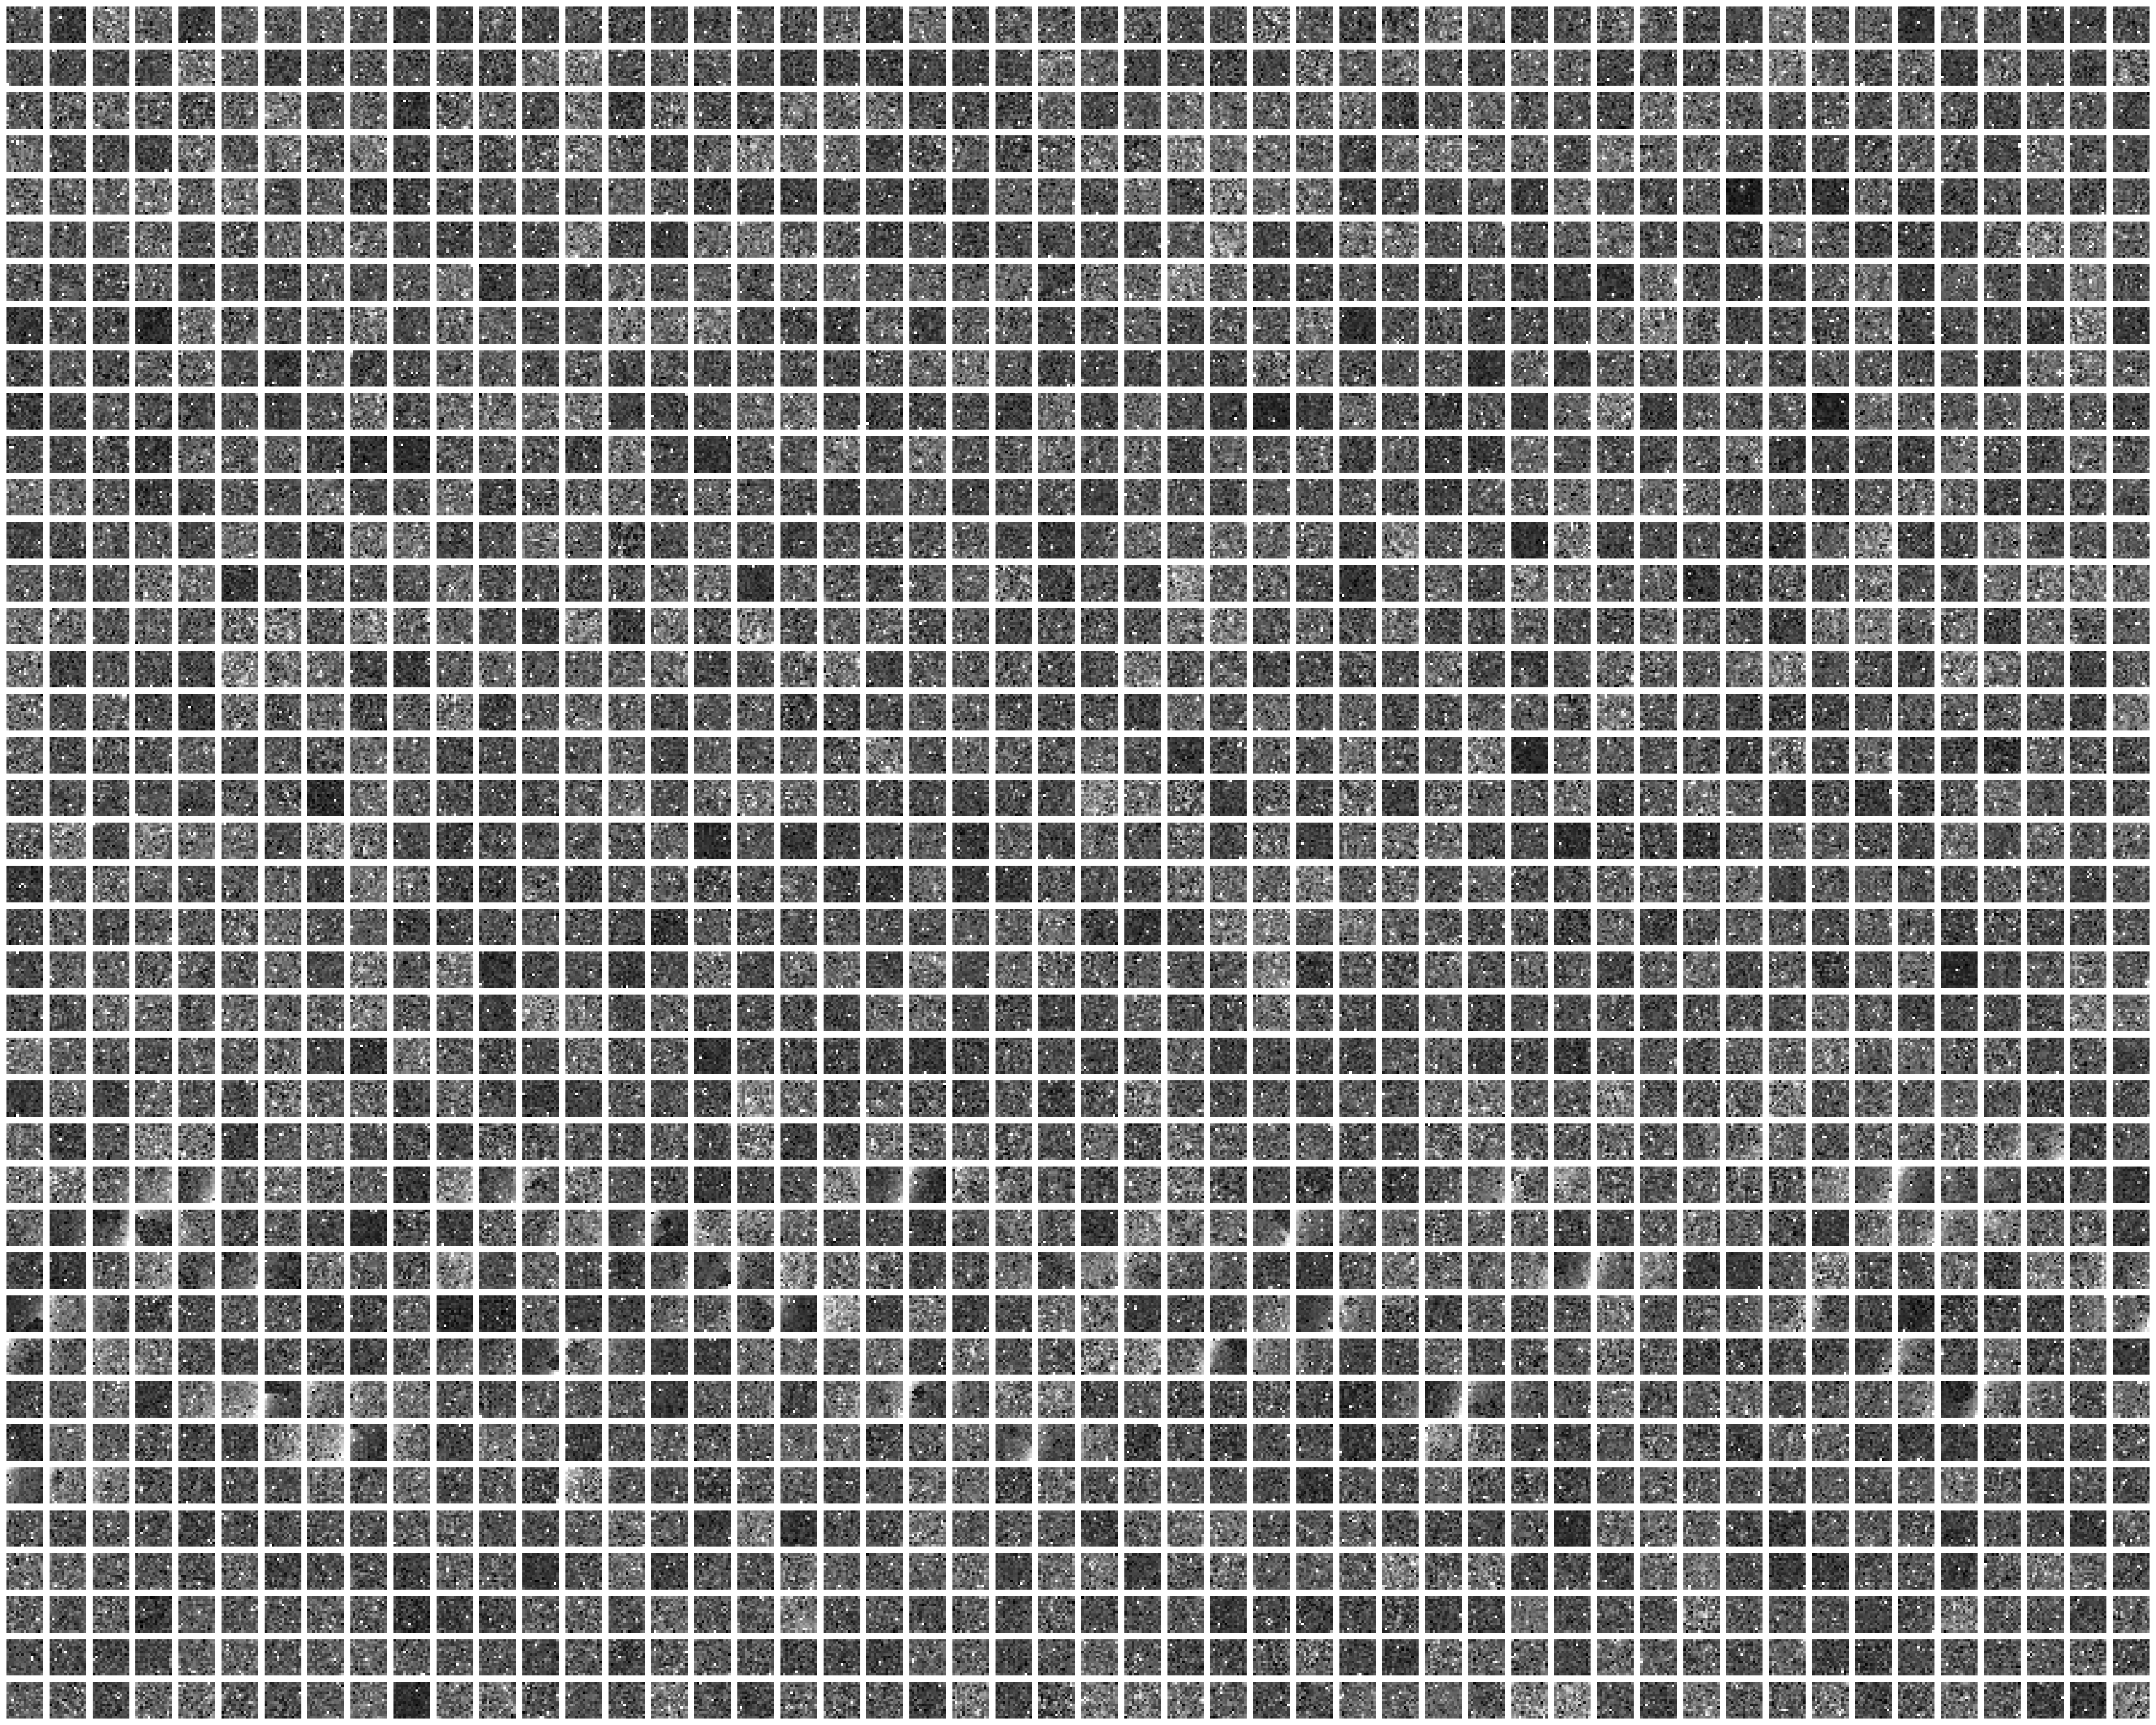

In [76]:
plot_images_in_grid(filtered_l2[500:2500])

In [208]:
plt.close()

In [177]:
streaks_1 = filtered[9:125]
streaks_1.extend(filtered[576:643])
streaks_1.extend(filtered_l[281:291])
# np.save("./TrainingData/FalseSet/realStreaks")



In [213]:
np.std(streaks_1[1])

49.395234771740554

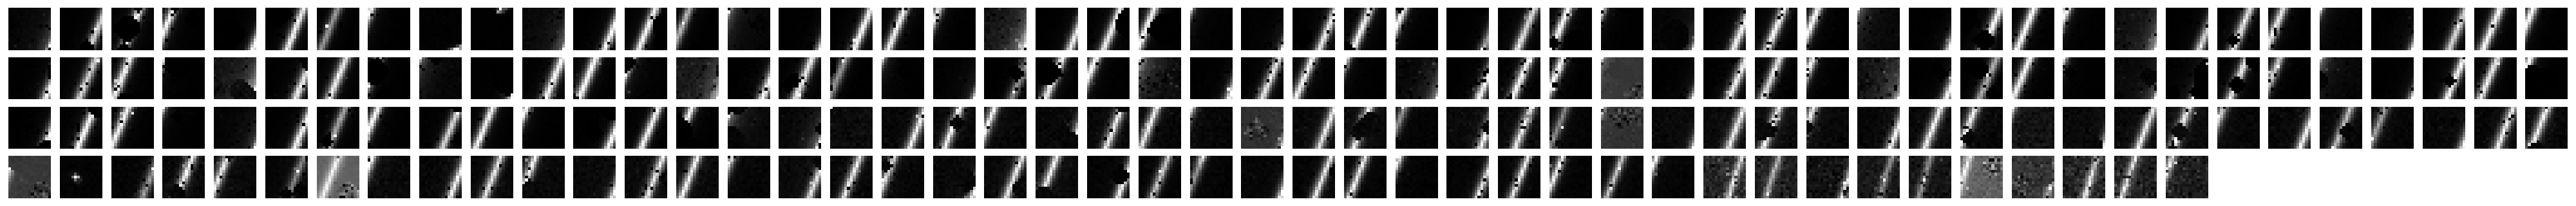

In [211]:
plot_images_in_grid(streaks_1)

### Augment Streak Data

In [25]:
import numpy as np
from skimage.transform import rotate
import random

def augment_dataset(
    images: list[np.ndarray],
    rotation_angles: list[float] = (0, 90, 180, 270),
    brightness_factors: list[float] = (0.5, 1.0, 1.5, 2.0),
    clip_min: float = None,
    clip_max: float = None
) -> list[np.ndarray]:
    aug_images = []
    if clip_min is None or clip_max is None:
        all_vals = np.concatenate([im.ravel() for im in images])
        dmin, dmax = all_vals.min(), all_vals.max()
        clip_min = dmin if clip_min is None else clip_min
        clip_max = dmax if clip_max is None else clip_max

    for im in images:
        for angle in rotation_angles:
            im_rot = rotate(im, angle, resize=False, preserve_range=True, order=1)
            for bf in brightness_factors:
                im_aug = im_rot * bf
                # clip back to valid range
                im_aug = np.clip(im_aug, clip_min, clip_max)
                aug_images.append(im_aug.astype(im.dtype))

    
    random.shuffle(aug_images)
    return aug_images


In [317]:

augmented_streaks = augment_dataset(
    streaks_1,
    rotation_angles=(0, 90, 180, 270),
    brightness_factors=(0.2, 0.5, 0.7, 1.0, 1.3, 1.5),
)
print(f"Original: {len(streaks_1)} images → Augmented: {len(augmented_streaks)} images")


Original: 193 images → Augmented: 4632 images


In [318]:
np.std(augmented_streaks[3])

70.96223554944511

In [347]:
plt.close()

In [323]:
# plot_images_in_grid(augmented_streaks[0:1000])

In [348]:
np.save("./TrainingData/FalseSet/4k_augmented_real_streaks.npy", augmented_streaks)

### Method to collect Streaks - addition

In [124]:
import numpy as np
from skimage.measure import label, regionprops
from typing import List

def has_streak(
    im: np.ndarray,
    high_sigma: float = 2.0,
    low_sigma:  float = 2.0,
    min_length: int   = 8
) -> bool:
    """
    i return True if 'im' (15×15) has any connected run of >= min_length
    pixels that are either > mean+high_sigma·std or < mean–low_sigma·std.
    works for horizontal, vertical, diagonal or any angled streak.
    """
    μ, σ = im.mean(), im.std()
    # bright or dim mask
    mask = (im > μ + high_sigma*σ) | (im < μ - low_sigma*σ)

    lbl = label(mask)
    for region in regionprops(lbl):
        minr, minc, maxr, maxc = region.bbox
        height = maxr - minr
        width  = maxc - minc
        if max(height, width) >= min_length:
            return True

    return False

def filter_images_with_streaks(
    images: List[np.ndarray],
    high_sigma: float = 2.0,
    low_sigma:  float = 2.0,
    min_length: int   = 8
) -> List[np.ndarray]:
    """
    From a list of 15×15 images, return only those where has_streak() is True.
    """
    return [
        im for im in images
        if has_streak(im, high_sigma, low_sigma, min_length)
    ]

if __name__ == "__main__":
    suspects = filter_images_with_streaks(
        ims,
        high_sigma=2.5,
        low_sigma=2.5,
        min_length=5
    )
    print(f"Found {len(suspects)}")


Found 4283


In [174]:
# plot_images_in_grid(filtered_images)

In [169]:
suspected_streaks = suspects

In [170]:
import numpy as np

def filter_non_overlapping(suspected_streaks: np.ndarray,
                           bad_masks: np.ndarray):

    unique = []
    overlap_count = 0

    for im in suspected_streaks:
        if any(np.array_equal(im, bm) for bm in bad_masks):
            overlap_count += 1
        else:
            unique.append(im)

    unique = np.array(unique)
    return unique, overlap_count

filtered_images, num_overlap = filter_non_overlapping(suspected_streaks, bad_masks)
print(f"Number of overlapping images: {num_overlap}")


Number of overlapping images: 3007


In [176]:
np.save("./TrainingData/FalseSet/1k_streaks_andbadmask", filtered_images)

# Collect Bad Masking Images

In [4]:
plt.close()

In [10]:
ims = np.load("../2025Work/Searches/V2_Apr9_pos_pt5_664k_2moreconvlayers.npy")

bad_masks = filtered[1100:]
bad_masks.extend(filtered_l[1000:7050])
bad_masks.extend(filtered_l[9000:15000])
bad_masks.extend(filtered_l[5:28])

In [11]:
len(bad_masks)

19744

In [15]:
plot_images_in_grid(bad_masks[0:1000])

In [39]:
def augment_dataset(
    images: list[np.ndarray],
    rotation_angles: list[float] = (0.0,180.),
    brightness_factors: list[float] = (0.5, 1.0),
    aug_images = []
    ):

    for im in images:
        for angle in rotation_angles:
            im_rot = rotate(im, angle, resize=False, preserve_range=True, order=1)
            for bf in brightness_factors:
                im_aug = im_rot * bf
                aug_images.append(im_aug.astype(im.dtype))
    
    random.shuffle(aug_images)
    return aug_images

augmented_bad_masks = augment_dataset(bad_masks)

In [40]:
len(augmented_bad_masks)

78976

In [41]:
np.save("TrainingData/FalseSet/80k_augmented_bad_masks.npy", augmented_bad_masks)

# Generate Streak Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt



def generate_streak(
    img_size=15,
    brightness_range=(0.2, 200),# overall streak brightness
    thickness_range=(1.0, 4.0), # thickness correlated to brightness
    end_cutoff_prob=0.1   # chance to see a glowing terminus
):
    """
    returns a (img_size x img_size) numpy array with one constant-brightness streak.
    """
    cx = cy = (img_size - 1) / 2.0

    theta = np.random.rand() * np.pi
    dx, dy = np.cos(theta), np.sin(theta)

    b = np.random.uniform(*brightness_range)


    norm_b = (b - brightness_range[0]) / (brightness_range[1] - brightness_range[0])
    t = thickness_range[0] + norm_b * (thickness_range[1] - thickness_range[0])

    corners = np.array([
        [-cx, -cy],
        [-cx,  (img_size-1)-cy],
        [(img_size-1)-cx, -cy],
        [(img_size-1)-cx, (img_size-1)-cy]
    ])
    t_vals = corners.dot([dx, dy])
    t0, t1 = t_vals.min(), t_vals.max()

    if np.random.rand() < end_cutoff_prob:
        span = t1 - t0
        α = np.random.uniform(0.2, 0.5) * span
        if np.random.rand() < 0.5:
            t0 += α
        else:
            t1 -= α

    img = np.zeros((img_size, img_size), dtype=np.float32)
    for i in range(img_size):
        for j in range(img_size):
            x, y = j - cx, i - cy
            proj = x*dx + y*dy
            if proj < t0 or proj > t1:
                continue

            # distance to streak center line
            px, py = cx + proj*dx, cy + proj*dy
            dist = np.hypot(j - px, i - py)

            # use constant b and t
            sigma = max(0.5, t * 0.5)
            img[i,j] = b * np.exp(-0.5 * (dist / sigma)**2)

    return img



bkgs = np.load("./TrainingData/S1_shifted_DarkPixelsRemoved_Normalized_BitArtifactCleaned_false_bkgs.npy")
bkgs_with_streaks = []

for idx, bg in enumerate(bkgs[50000:90000]):
    streak = generate_streak(img_size=bg.shape[0],
                             brightness_range=(0.4, 5),
                             thickness_range=(1.0, 4.0))
    implanted = bg + streak
    bkgs_with_streaks.append(implanted)


In [2]:
np.save("./TrainingData/FalseSet/40ksynth_streaks", bkgs_with_streaks)

In [ ]:
plt.close()